<a href="https://colab.research.google.com/github/anandha2017/simple-github-test/blob/master/TrialBalanceMontecarloSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Parameters
num_accounts = 30000
num_simulations = 10
num_days = 30
annual_interest_rate = 0.05
daily_interest_rate = annual_interest_rate / 365

In [47]:
def monte_carlo_simulation(num_accounts, num_simulations, num_days, daily_interest_rate):
  differences = []
  for sim in range(num_simulations):
    # Generate random balances
    balances = np.random.uniform(1000, 5000, size=(num_accounts, num_days))

    # Calculate daily accruals to 10 decimal places
    daily_accruals = np.round(balances * daily_interest_rate, 10)
    # print('daily = ')
    # print(daily_accruals)
    # print('np')
    # print(np)

    # Method 1: Sum then round
    method1_interest = np.round(np.sum(daily_accruals, axis=1), 2)
    # print('Sum then round = ')
    # print(method1_interest)

    # Method 2: Round then sum
    method2_interest = np.sum(np.round(daily_accruals, 2), axis=1)
    # print('Round then sum = ')
    # print(method2_interest)

    # Difference per account
    diff = method1_interest - method2_interest
    print('diff = ')
    print(diff)

    # Total difference
    total_diff = np.sum(diff)
    # print('total_diff = ')
    # print(total_diff)

    differences.append(total_diff)
    # print('differences = ')
    # print(differences)

    # Optional: Print progress
    if (sim + 1) % 100 == 0:
      print(f"Simulation {sim + 1}/{num_simulations} completed")

  return differences

In [48]:
# Run the simulation
differences = monte_carlo_simulation(num_accounts, num_simulations, num_days, daily_interest_rate)


diff = 
[-1.00000000e-02  1.77635684e-15  0.00000000e+00 ... -1.00000000e-02
 -1.00000000e-02  2.00000000e-02]
diff = 
[ 0.    0.03 -0.03 ... -0.01 -0.02  0.02]
diff = 
[ 0.01 -0.02 -0.01 ...  0.01  0.02  0.02]
diff = 
[ 1.00000000e-02 -1.00000000e-02  1.77635684e-15 ...  2.00000000e-02
 -2.00000000e-02  2.00000000e-02]
diff = 
[-0.01 -0.03  0.02 ... -0.02  0.03 -0.02]
diff = 
[-0.01  0.04  0.02 ...  0.01 -0.01  0.01]
diff = 
[ 3.00000000e-02 -2.00000000e-02  3.00000000e-02 ... -1.00000000e-02
 -1.77635684e-15  1.00000000e-02]
diff = 
[-2.00000000e-02  0.00000000e+00  1.00000000e-02 ... -3.55271368e-15
  0.00000000e+00  2.00000000e-02]
diff = 
[-1.77635684e-15  1.00000000e-02  1.77635684e-15 ...  1.00000000e-02
 -3.55271368e-15 -2.00000000e-02]
diff = 
[ 2.00000000e-02  1.00000000e-02 -1.00000000e-02 ...  1.00000000e-02
  3.55271368e-15  1.00000000e-02]


In [42]:
# Convert to NumPy array
differences = np.array(differences)

Average Difference: £12.18
Maximum Difference: £14.75
Minimum Difference: £10.54
Standard Deviation: $1.29


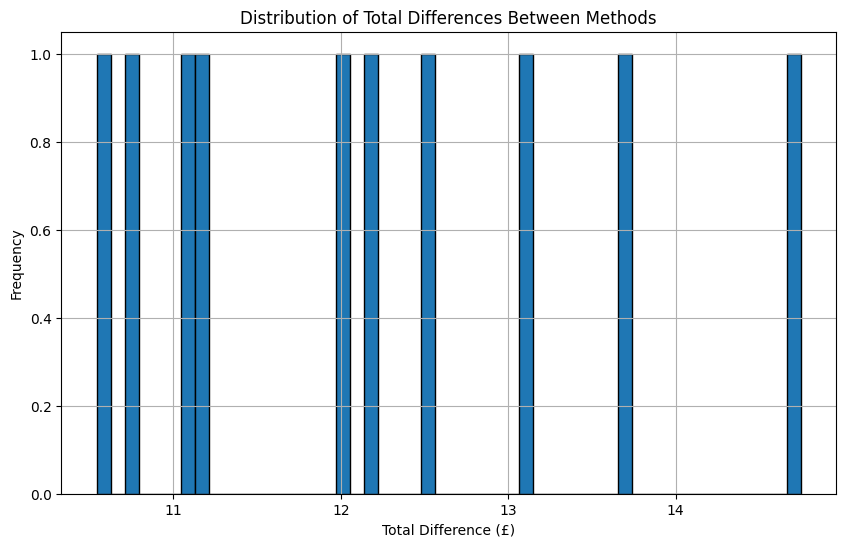

In [43]:
# Analysis
average_difference = np.mean(differences)
max_difference = np.max(differences)
min_difference = np.min(differences)
std_dev_difference = np.std(differences)

print(f"Average Difference: £{average_difference:.2f}")
print(f"Maximum Difference: £{max_difference:.2f}")
print(f"Minimum Difference: £{min_difference:.2f}")
print(f"Standard Deviation: ${std_dev_difference:.2f}")

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=50, edgecolor='k')
plt.title('Distribution of Total Differences Between Methods')
plt.xlabel('Total Difference (£)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()